# Projet Machine Learning

## Auteur : Nicolas Lejay

## Octobre 2023

***
# Projet 1 : les pingouins

## Chargement des données

In [1]:
import pandas as pd
import numpy as np

df_peng = pd.read_csv('src/penguins_size.csv')
df_peng.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df_peng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Peu de données sont manquantes. Dans la suite nous n'utiliserons pas les variables "sex" et "island". Nous pouvons les supprimer et également supprimer les lignes ayant des valeurs manquantes sur les autres variables.

In [3]:
df_peng = df_peng.drop(['sex', 'island'], axis=1)
df_peng = df_peng.dropna()

In [4]:
df_peng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


Quelles sont les espèces ? Quel est le nombre d'individus par espèce ?

In [5]:
df_peng.groupby('species')['species'].count()

species
Adelie       151
Chinstrap     68
Gentoo       123
Name: species, dtype: int64

Statistiques des variables

In [6]:
df_peng.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


***
## 1. Partition en utilisant un arbre de profondeur 1.


In [7]:
from sklearn.tree import DecisionTreeClassifier

# Instanciation d'un objet DecisionTreeClassifier
tree_model1 = DecisionTreeClassifier(max_depth=1)

# Données d'entraînement
X = df_peng.drop(['species','flipper_length_mm', 'body_mass_g'], axis=1)
y = df_peng['species']

# Entraînement model
tree_model1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

## 2. Représentation des individus selon la longueur et la profondeur de leur culmen.

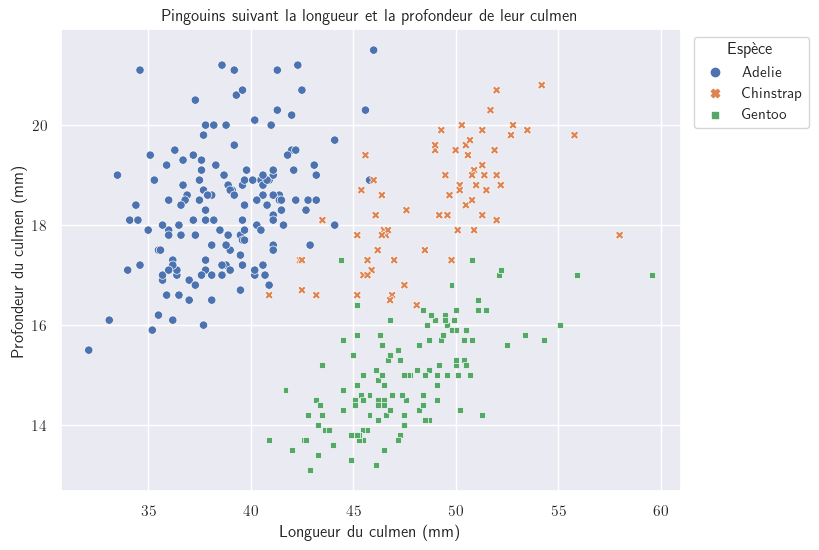

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})
sns.set_theme()

# Scatterplot de la profondeur du culmen des pingouins vs longueur du culmen
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=df_peng, x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', style='species')

# titre et labels
plt.title("Pingouins suivant la longueur et la profondeur de leur culmen")
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")
# Légende
plt.legend(title='Espèce', bbox_to_anchor=(1.22,1), facecolor='white')


plt.show()

## 3. Même représentation en incluant la frontière de décision du modèle.

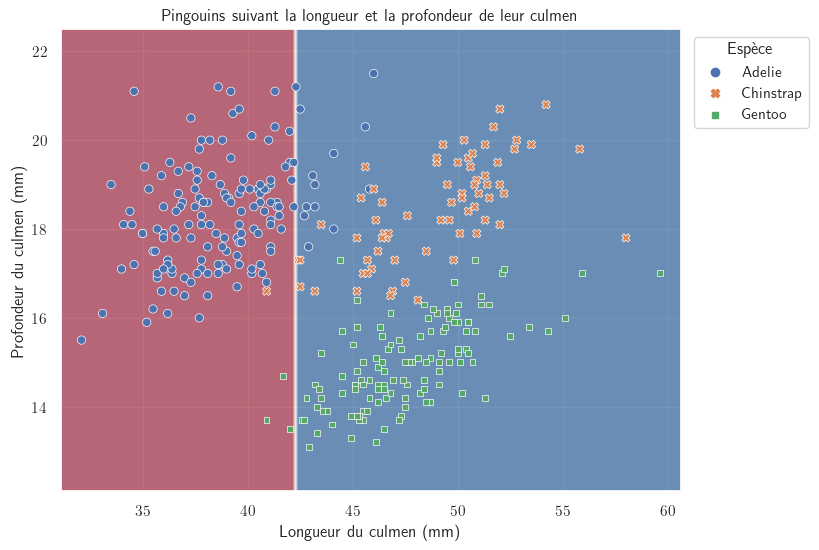

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(figsize=(8,6))

# Zones de prédiction de l'arbre
DecisionBoundaryDisplay.from_estimator(tree_model1, X, cmap='RdBu', alpha=0.6, ax=ax)

# Scatterplot de la profondeur du culmen des pingouins vs longueur du culmen
sns.scatterplot(data=df_peng, x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', style='species', 
                ax=ax)

# titre et labels
plt.title("Pingouins suivant la longueur et la profondeur de leur culmen")
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")
# Légende
plt.legend(title='Espèce', bbox_to_anchor=(1.22,1), facecolor='white')

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)
plt.show()

On remarque que l'arbre classe les pingouins suivant deux catégories, ce qui est logique pour un arbre binaire de profondeur 1. La décision de classification se fait sur la variable *culmen_length_mm* : les pingouins ayant une longueur de culmen inférieure à environ 42 mm sont dans un catégorie (sûrement Adélie) et les autres dans l'autre catégorie (définie comme Chintrap ou Gentoo). Avec une profondeur égale à 1, il est impossible de faire une classification en trois catégories.

## 4. Arbre de classification

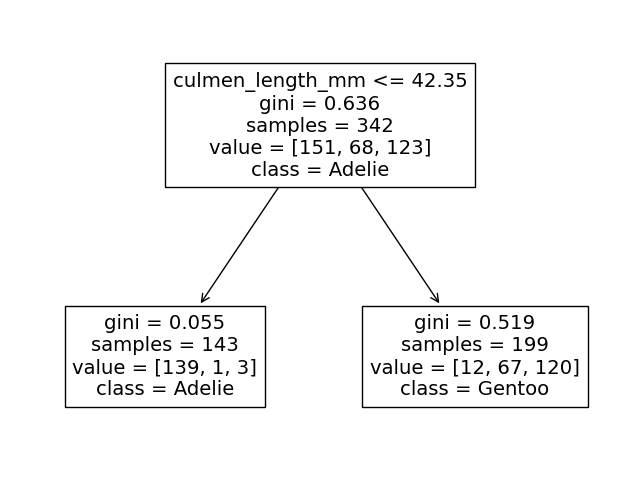

Ordre des espèces : ['Adelie', 'Chinstrap', 'Gentoo']


In [10]:
from sklearn.tree import plot_tree
plt.rcParams.update(plt.rcParamsDefault)

feature_names = X.columns.tolist()
classes = tree_model1.classes_.tolist()

fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(tree_model1, feature_names=feature_names,
          class_names=classes, ax=ax)

plt.show()
print(f"Ordre des espèces : {classes}")

On retrouve le fait que la décision de classification se fait sur la longueur du culmen : 
- Les pingouins ayant une longueur de culmen inférieure ou égale à 42.35 sont classés dans la catégorie « Adélie ». Cela concerne 143 pingouins sur les 342 de l'échantillon. Parmi eux, on compte 139 pingouins Adélie sur 151, 1 Chinstrap sur 68 et 3 Gentoo sur 123. 
- Les autres sont classés dans la catégorie « Gentoo ». 

Avec cette classification, l'espèce Chinstrap est ignorée et les pingouins correspondant sont toujours classés comme étant de l'espèce Adélie ou Gentoo.

## 5. Prédiction pour un nouvel échantillon

In [11]:
# Nouvel échantillon
echant = pd.DataFrame({'culmen_length_mm':35, 'culmen_depth_mm':17}, index=[0])

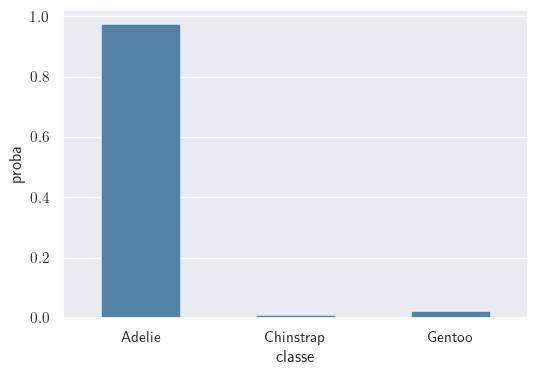

In [12]:
echant = pd.DataFrame({'culmen_length_mm':35, 'culmen_depth_mm':17}, index=[0])
proba = pd.DataFrame({'proba' : tree_model1.predict_proba(echant)[0].tolist(), 'classe':classes})

# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})
sns.set_theme()

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=proba, x='classe', y='proba', width=0.5, color="steelblue", edgecolor="steelblue")

plt.show()

In [13]:
display(proba)

,proba,classe
0,0.972028,Adelie
1,0.006993,Chinstrap
2,0.020979,Gentoo


Un échantillon dont le culmen a pour longueur 35 mm et pour profondeur 17 mm a une probabilité égale à 0.97 d'être de l'espèce Adélie, 0.007 d'être de l'espèce Chinstrap et 0.02 d'être de l'espèce Gentoo. Ce résultat est conforme aux effectifs de la feuille gauche de l'arbre :
- 139 pingouins sur 143 de cette feuille sont de l'espèce Adélie, soit une fréquence de $\small\dfrac{139}{143}\approx 0.97$.
- 1 pingouin sur 143 de cette feuille sont de l'espèce Chinstrap, soit une fréquence de $\small\dfrac{1}{143}\approx 0.007$.
- 3 pingouins sur 143 de cette feuille sont de l'espèce Gentoo, soit une fréquence de $\small\dfrac{139}{143}\approx 0.02$.

Les probabilités calculées sont donc les fréquences obtenues sur les données d'entraînement.

## 6. Utilisation d'un arbre de profondeur 2

Création et entraînement du modèle.

In [14]:
# Instanciation d'un objet DecisionTreeClassifier
tree_model2 = DecisionTreeClassifier(max_depth=2)

# Données d'entraînement
X = df_peng.drop(['species','flipper_length_mm', 'body_mass_g'], axis=1)
y = df_peng['species']

# Entraînement model
tree_model2.fit(X,y)

DecisionTreeClassifier(max_depth=2)

Représentation des frontières de décision du modèle.

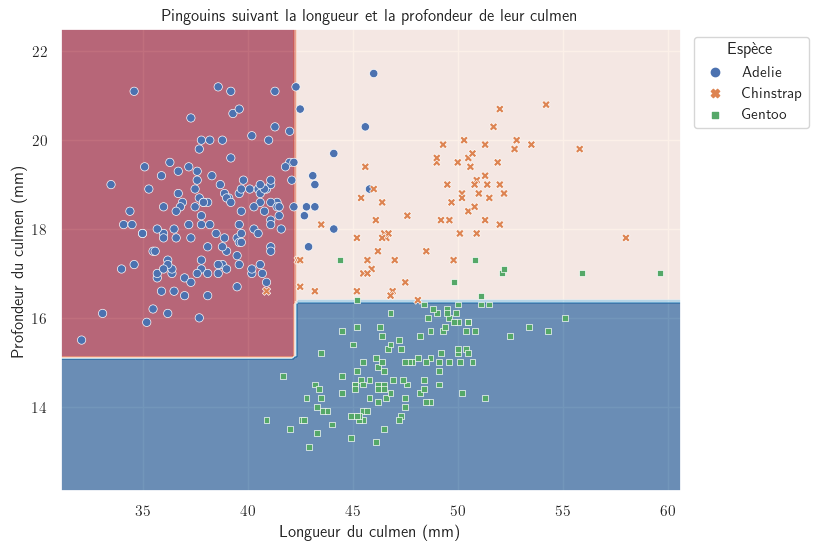

In [15]:
fig, ax = plt.subplots(figsize=(8,6))

# Zones de prédiction de l'arbre
DecisionBoundaryDisplay.from_estimator(tree_model2, X, cmap='RdBu', alpha=0.6, ax=ax)

# Scatterplot de la profondeur du culmen des pingouins vs longueur du culmen
sns.scatterplot(data=df_peng, x='culmen_length_mm', y='culmen_depth_mm',
                hue='species', style='species', 
                ax=ax)

# titre et labels
plt.title("Pingouins suivant la longueur et la profondeur de leur culmen")
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")
# Légende
plt.legend(title='Espèce', bbox_to_anchor=(1.22,1), facecolor='white')

# Grille
plt.grid(visible=True)
ax.set_axisbelow(True)
plt.show()

On remarque qu'à la profondeur 1, le modèle a fait le même découpage en deux catégories. Mais pour chacune de ces catégories, un nouveau découpage a été fait (profondeur 2 de l'arbre) pour donner 4 zones. Une espèce est attribuée à chaque zone. Le graphique précédent ne montre que 3 zones car les deux correspondant à l'espèce Gentoo ont été fusionnées.

Cet arbre est bien plus performant car il permet de créer une séparation (non parfaite) entre les pingouins Chinstrap et Gentoo. Les trois espèces sont donc représentées dans les catégories prédites.

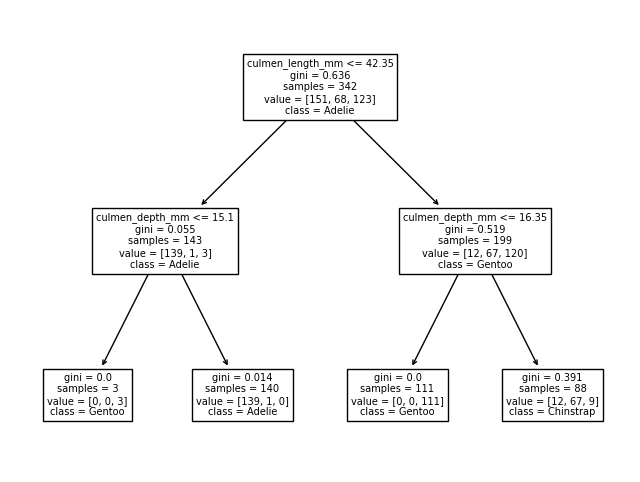

Ordre des espèces : ['Adelie', 'Chinstrap', 'Gentoo']


In [16]:
plt.rcParams.update(plt.rcParamsDefault)

feature_names = X.columns.tolist()
classes = tree_model2.classes_.tolist()

fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(tree_model2, feature_names=feature_names,
          class_names=classes, ax=ax)

plt.show()
print(f"Ordre des espèces : {classes}")

La représentation de l'arbre vient confirmer ce que nous affirmions précédemment : chaque ensemble du premier niveau de l'arbre a été divisé en deux sous ensemble. Nous obtenons donc 4 feuilles, dont deux correspondent à la catégorie Gentoo. Reprenons un nouvel échantillon (le même qu'à la question 1.5) et regardons les probabilités associées aux espèces de la catégorie dans laquelle cet échantillon est classé.

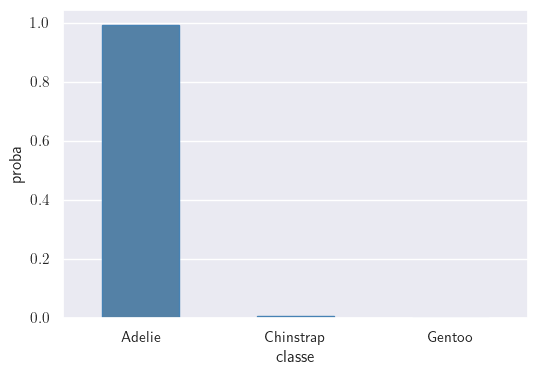

In [17]:
proba = pd.DataFrame({'proba' : tree_model2.predict_proba(echant)[0].tolist(), 'classe':classes})

# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})
sns.set_theme()

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(data=proba, x='classe', y='proba', width=0.5, color="steelblue", edgecolor="steelblue")

plt.show()

In [18]:
display(proba)

,proba,classe
0,0.992857,Adelie
1,0.007143,Chinstrap
2,0.000000,Gentoo


Si on suit le parcours de l'arbre pour le nouvel échantillon, on s'aperçoit que ce-dernier est classé dans la catégorie de la deuxième feuille en partant de la gauche, c'est à dire dans la catégorie Adélie. La fréquence de pingouins Adélie dans ce sous-ensemble est $\small\dfrac{139}{140}\approx 0.99$, d'où la probabilité donnée par scikit-learn. En faisant le calcul des fréquences pour le Gentoo et le Chinstrap, on trouve également les probabilités données par scikit-learn.

***
# Projet 2 : Cancer du sein
## Chargement des données

In [19]:
df_cancer = pd.read_csv('src/cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
df_cancer = df_cancer.drop('Unnamed: 32', axis=1)

In [22]:
df_cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [23]:
df_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Il n'y a pas de valeurs manquantes, il n'y a bien que deux diagnostics. La répartition tumeurs bénignes - tumeurs malignes n'est pas trop déséquilibrée.

## Exercice 1 : méthode du Hold Out
### Question 1 : Division du jeu de données : données d'entraînement et données de test

In [24]:
from sklearn.model_selection import train_test_split

# Séparations features-labels
X = df_cancer[['radius_mean', 'concave points_mean']]
y = df_cancer['diagnosis']

# Remplacement des valeurs de y
y = y.replace({'B':0, 'M':1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [25]:
print(f"Pourcentage d'enregistrements de X_train : {len(X_train)/len(X)*100}")
print(f"Pourcentage d'enregistrements de X_test : {len(X_test)/len(X)*100}")

Pourcentage d'enregistrements de X_train : 79.96485061511423
Pourcentage d'enregistrements de X_test : 20.035149384885763


La séparation s'est bien faite suivant le rapport 80/20.

### Question 2 à 6 : Entraînement et prédictions par arbre de décision

In [26]:
# Instanciation d'un arbre de décision
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

In [27]:
# Entraînement du modèle
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [28]:
# Prédictions sur données de test
y_pred = dt.predict(X_test)

In [29]:
# Affichage des prédicitons
df_predictions = X_test.copy()
df_predictions['diagnostic'] = y_test
df_predictions['prediction'] = y_pred
df_predictions.head()

,radius_mean,concave points_mean,diagnostic,prediction
421,14.69,0.06300,0,1
47,13.17,0.07340,1,0
292,12.95,0.03370,0,0
186,18.31,0.05814,1,1
414,15.13,0.02739,1,0


In [30]:
# Pourcentage de bonnes prédictions
print(round(dt.score(X_test, y_test)*100,1), "%")

88.6 %


88.6 % des échantillons ont été bien classés.

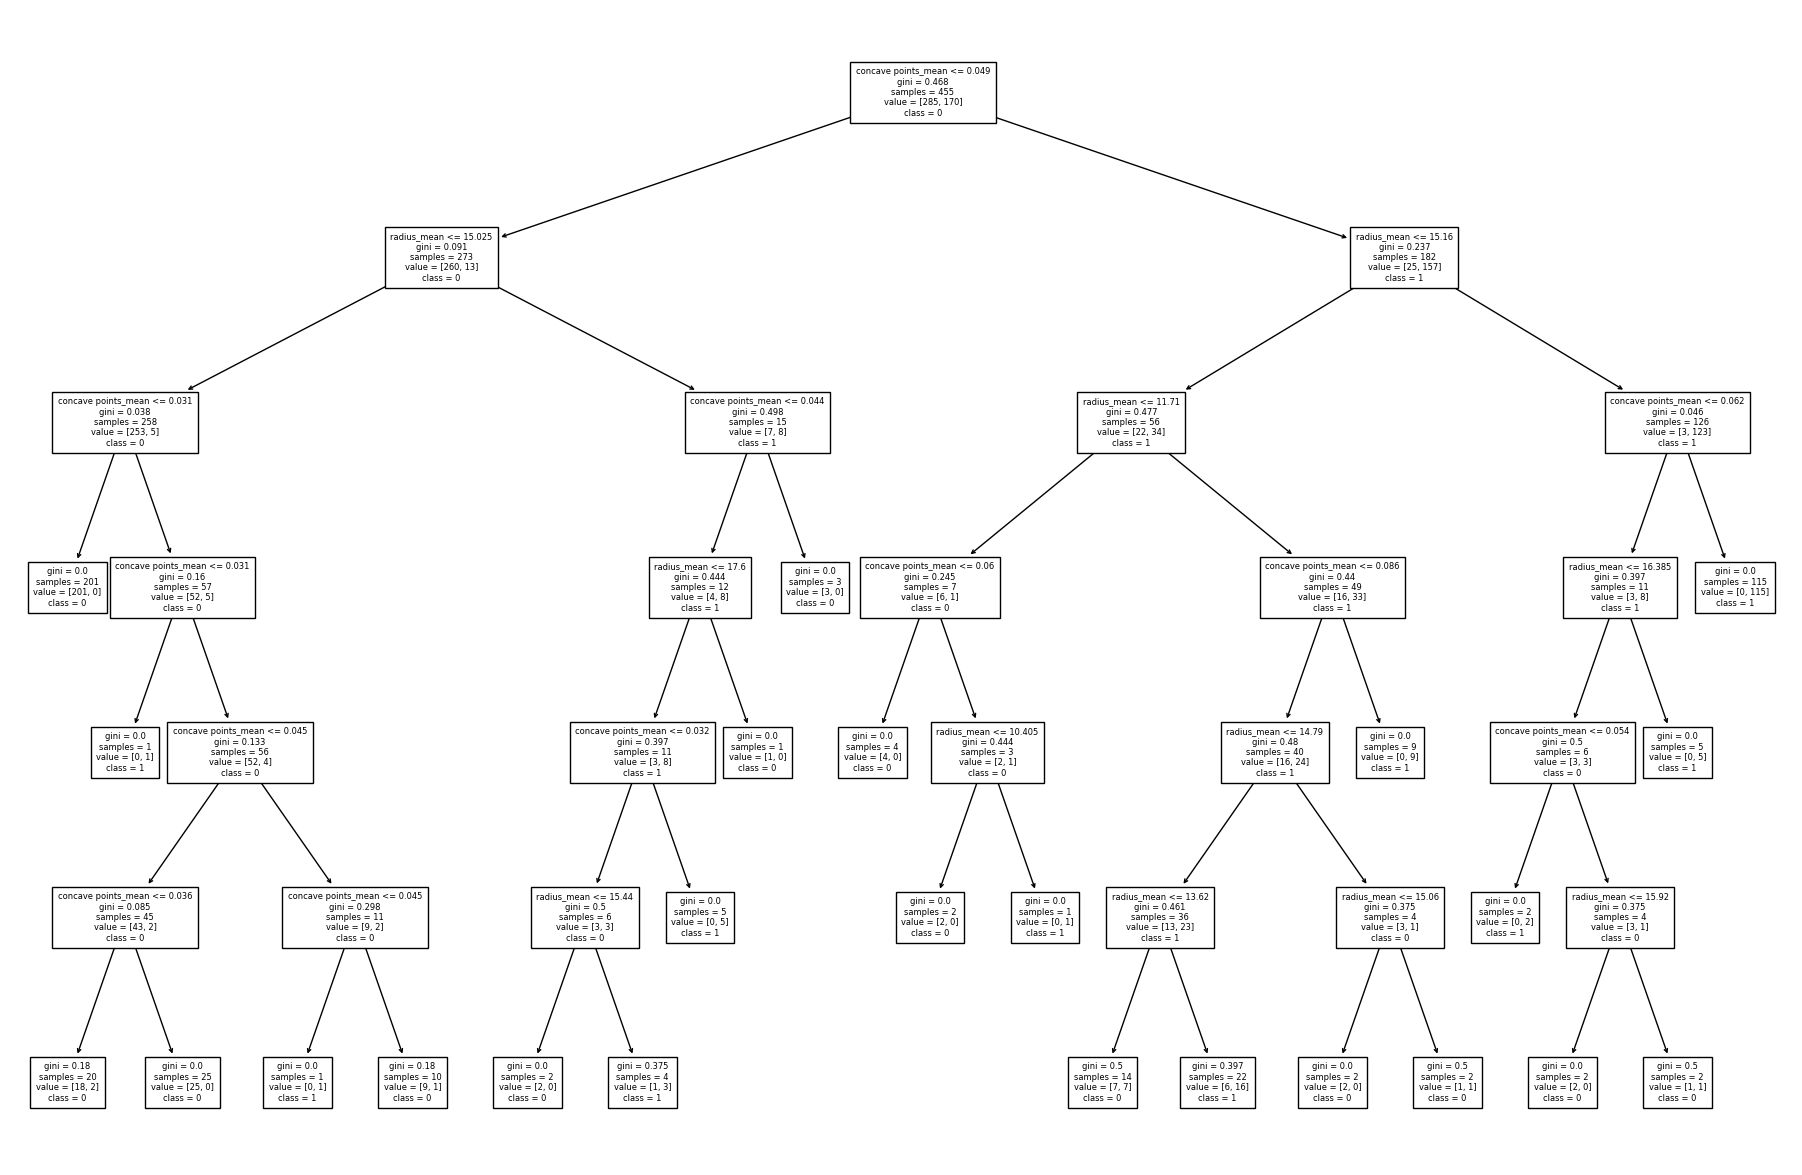

In [31]:
plt.rcParams.update(plt.rcParamsDefault)

feature_names = X_train.columns.tolist()
classes = dt.classes_.astype('str').tolist()

fig, ax = plt.subplots(figsize=(23,15))
plot_tree(dt, feature_names=feature_names,
          class_names=classes, 
          fontsize=6, ax=ax)

plt.show()

A chaque niveau de l'arbre, le modèle crée une subdivision de chaque subdivision précédente jusqu'à atteindre la profondeur maximale ou jusqu'à ce qu'une subdivision ne contienne plus qu'une classe d'échantillons. C'est pour cela que l'arbre n'est pas complet et que certaines feuilles ne se trouvent pas à la profondeur maximale de l'arbre.

### Question 7 : inconvénient de la méthode du Hold Out

La méthode du Hold Out partage les données en données d'entraînement et données de test. Ce partage est aléatoire et peut avoir des caractéristiques qui lui sont propres. Les performances du modèle risquent donc de varier suivant le partage fait. Pour palier à ce problème, on peut utiliser des méthodes comme la validation croisée qui entraîne le modèle sur plusieurs séparations différents du jeu de données.

***
## Exercice 2 : Choix du critère d'information

### Questions 1 à 3: Accuracy score

In [32]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred),3)

0.886

On retrouve le fait que 88.6 % des échantillons de X_test ont été bein classés.

### Questions 4 à 7 : Comparaison de modèles avec différents critères d'information.

Nous allons entraîner deux modèles : l'un ayant l'entropie comme critère d'information, l'autre l'indice de Gini.

In [33]:
# Sélection des features
X = df_cancer.drop(['id', 'diagnosis'], axis=1)

# Instanciations
dt_ent = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

# Entraînement des modèles
dt_ent.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

Arbre ayant l'entropie pour critère d'information


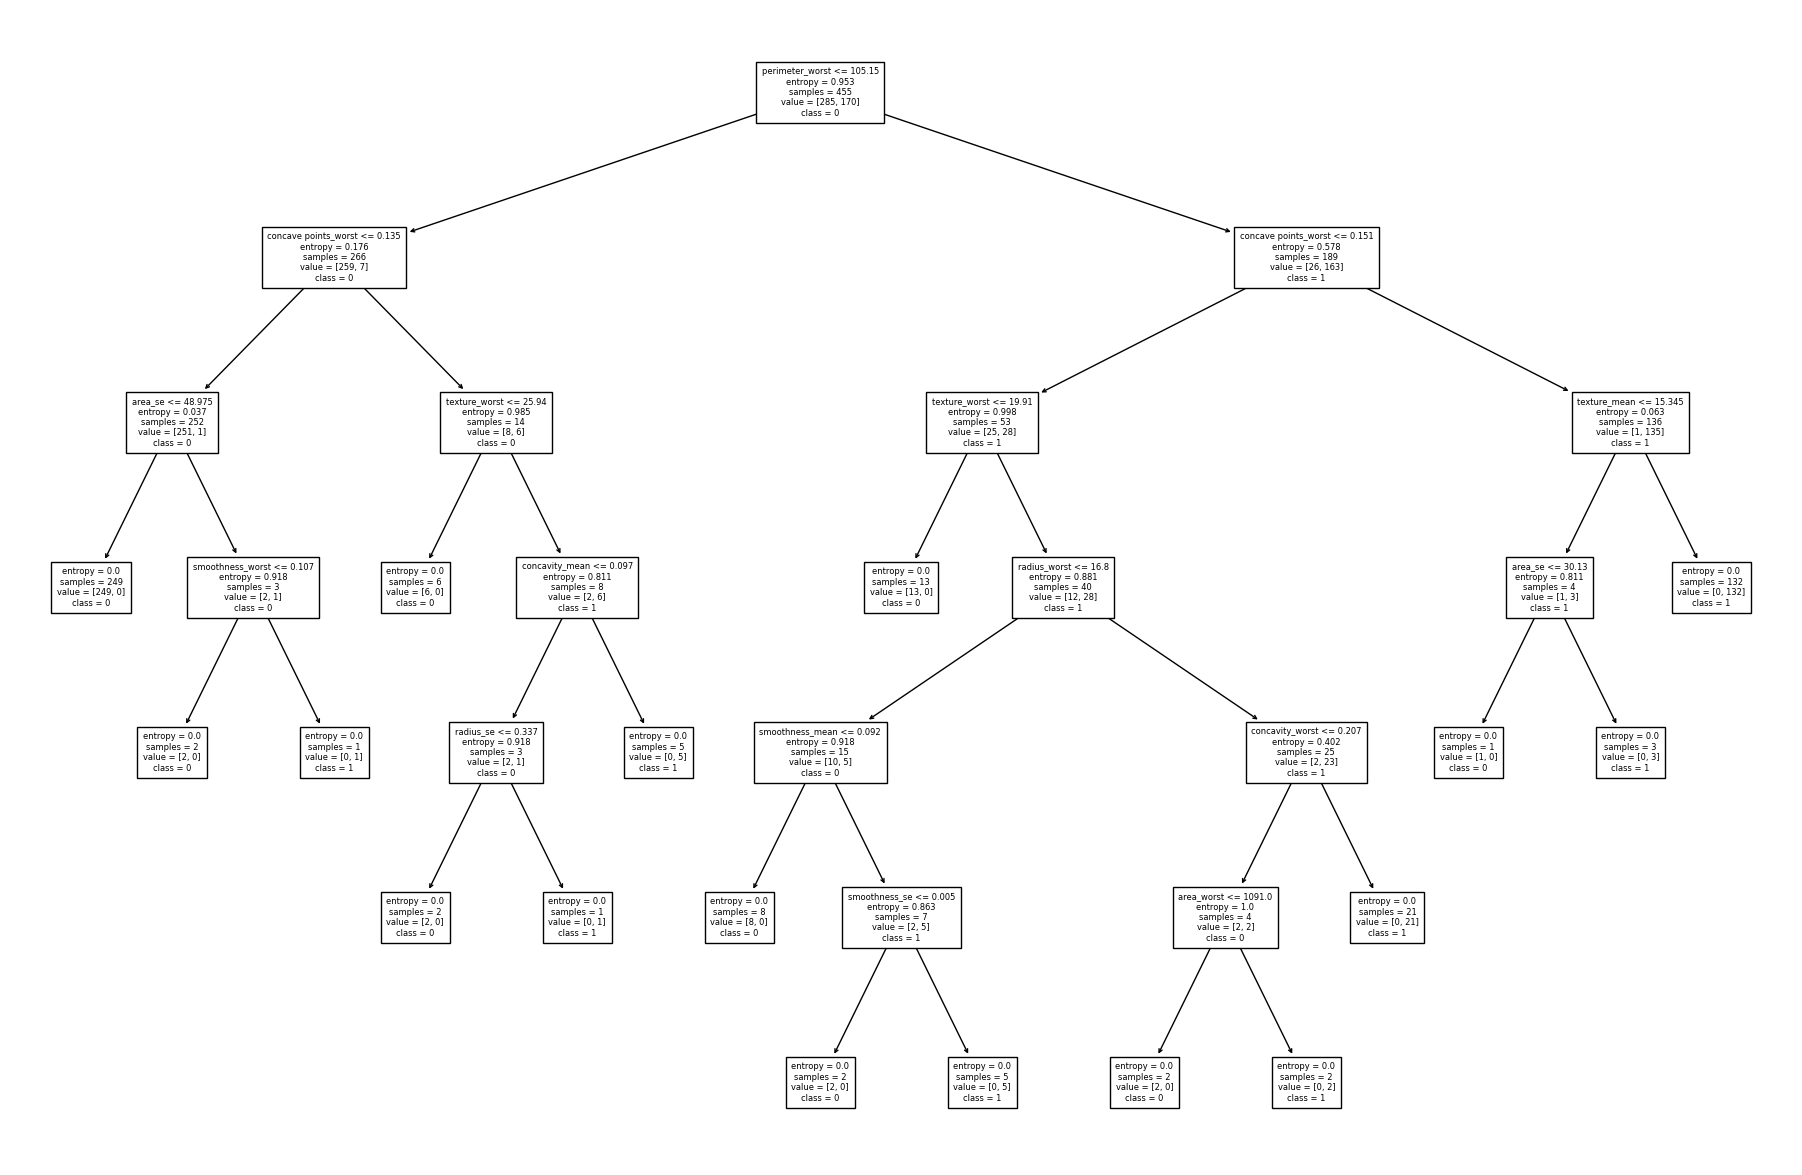

Arbre ayant l'indice de Gini pour critère d'information


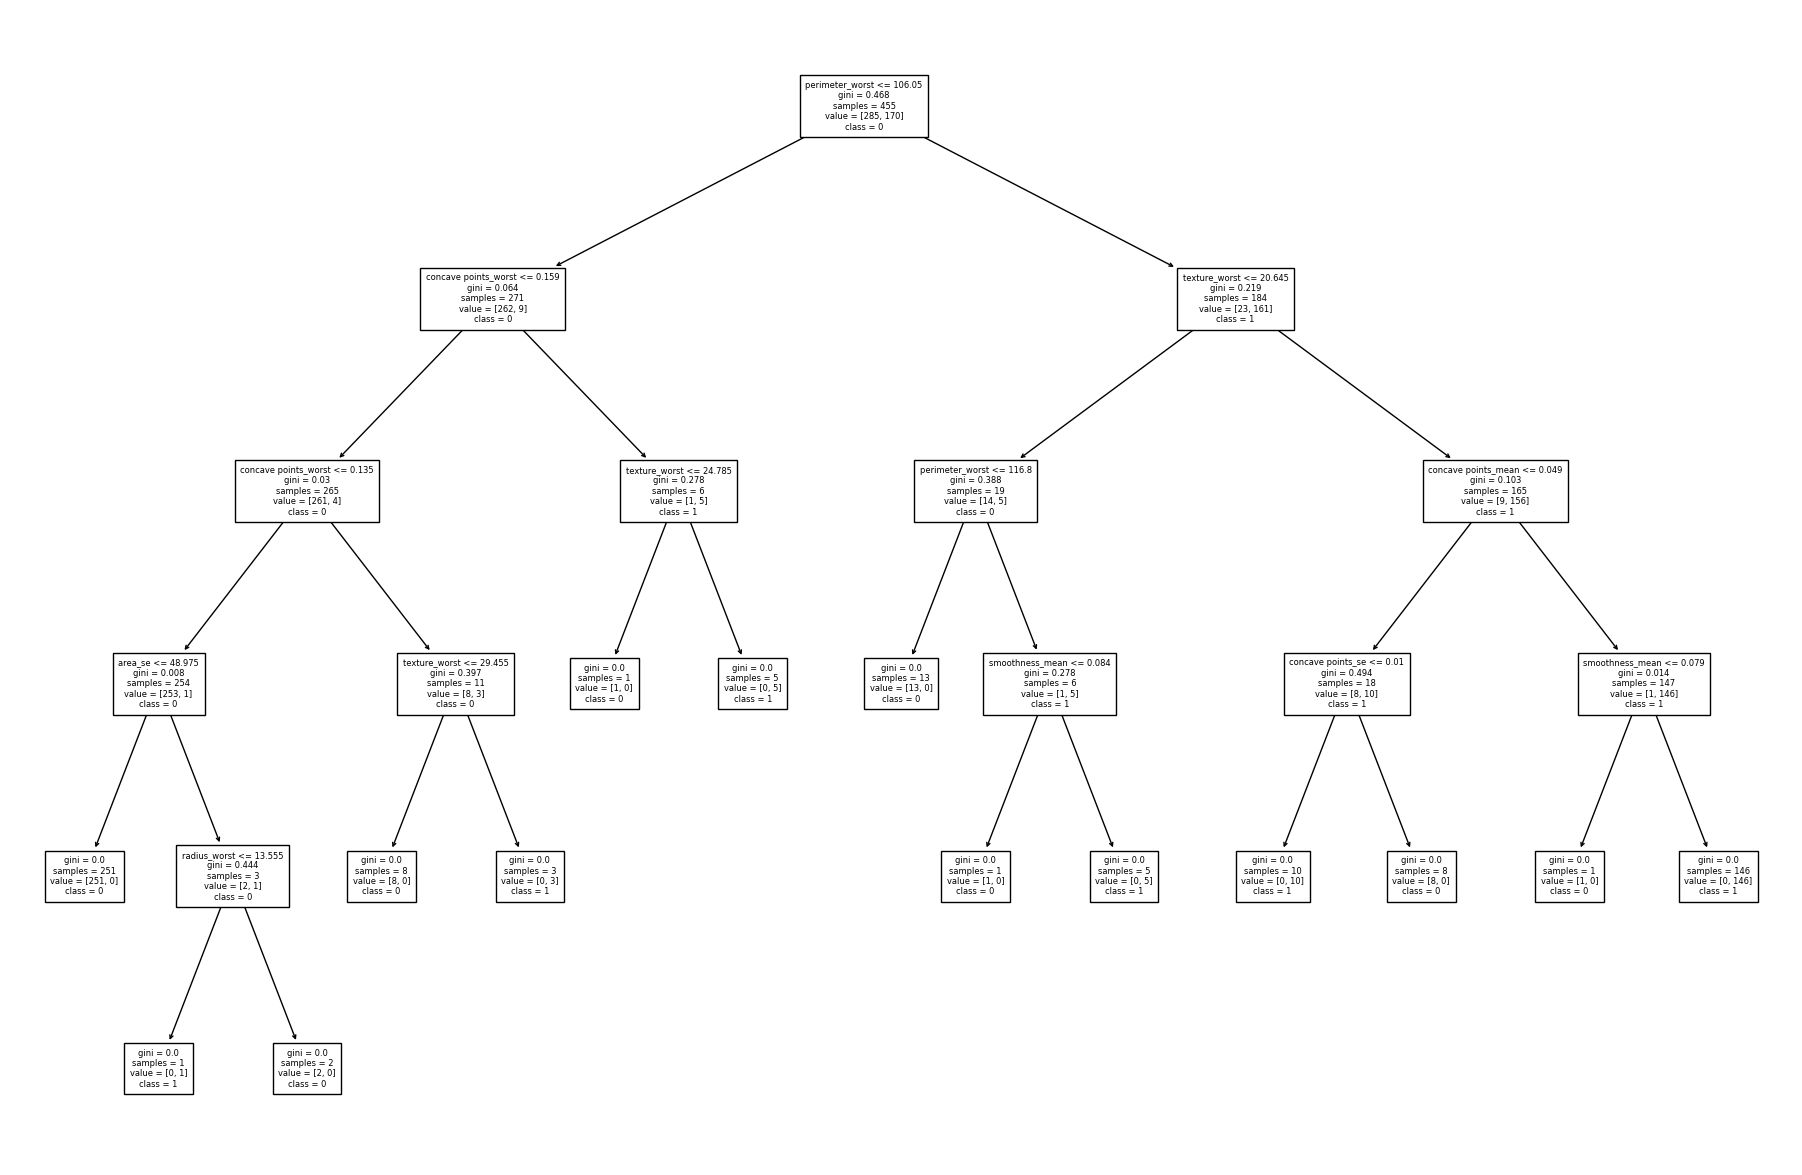

In [34]:
print("Arbre ayant l'entropie pour critère d'information")
feature_names = X_train.columns.tolist()
classes = dt.classes_.astype('str').tolist()

fig, ax = plt.subplots(figsize=(23,15))
plot_tree(dt_ent, feature_names=feature_names,
          class_names=classes, 
          fontsize=6, ax=ax)

plt.show()

print("Arbre ayant l'indice de Gini pour critère d'information")
feature_names = X_train.columns.tolist()
classes = dt.classes_.astype('str').tolist()

fig, ax = plt.subplots(figsize=(23,15))
plot_tree(dt_gini, feature_names=feature_names,
          class_names=classes, 
          fontsize=6, ax=ax)

plt.show()

On remarque que les arbres ont une forme différente. Les variables utilisées pour faire les subdivisions à chaque niveau sont également différentes.

In [35]:
# Prédictions sur données de test
y_pred_ent = dt_ent.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Accuracy scores
print("Score du modèle basé sur l'entropie :", round(accuracy_score(y_test, y_pred_ent),3))
print("Score du modèle basé sur l'indice de Gini :", round(accuracy_score(y_test, y_pred_gini),3))

Score du modèle basé sur l'entropie : 0.947
Score du modèle basé sur l'indice de Gini : 0.947


Malgré des arbres différents, les scores des deux modèles sont identiques.

***
## Exercice 3 : métriques de performance

### Question 1 : matrice de confusion et calcul de métriques de performance

Dans cette partie, nous reprendrons le modèle basé sur l'indice de Gini.

#### Matrice de confusion

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

matrice = confusion_matrix(y_test, y_pred_gini)

matrice

array([[71,  1],
       [ 5, 37]])

La matrice de confusion est donc :

|                               | Tumeurs bénignes prédite | Tumeurs malignes prédites |
|-------------------------------|:--------------------------:|:---------------------------:|
| **Tumeurs bénignes réelles**  |           71             |            1              |
| **Tumeurs malignes réelles**  |            5             |           37              |

#### Accuracy

Cette métrique est la proportion de bonnes prédictions sur l'ensemble des prédictions. La formule pour la calculer est donc :

$Accuracy=\dfrac{TP+TN}{TP+TN+FP+FN}$

où :

- $TP$ : True Positive (Tumeur maligne réelle et prédite)
- $TN$ : True Negative (Tumeur bénigne réelle et prédite)
- $FP$ : False Positive (Tumeur maligne prédite mais tumeur bénigne réelle)
- $FN$ : False Negative (Tumeur bénigne prédite mais tumeur maligne réelle)

In [37]:
TP = matrice[1][1]
TN = matrice[0][0]
FP = matrice[0][1]
FN = matrice[1][0]

accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy :", round(accuracy,2)) 

Accuracy : 0.95


On retrouve la valeur donnée dans la question précédente par la méthode accuracy_score.

#### Recall (ou Sensibilité)

Cet indicateur de performance est la proportion de tumeurs malignes prédites sur l'ensemble des tumeurs malignes.

$Recall=\dfrac{TP}{TP+FN}$

In [38]:
recall = TP/(TP+FN)

print("Recall :", round(recall,2))

Recall : 0.88


88 % des tumeurs malignes sont prédites comme malignes.

#### Spécificité

Cet indicateur de performance est la proportion de tumeurs bénignes prédites sur l'ensemble des tumeurs bénignes.

$Specificity=\dfrac{TN}{TN+FP}$

In [39]:
specificity = TN/(TN+FP)

print("Spécificité :", round(specificity,2))

Spécificité : 0.99


99 % des tumeurs bénignes sont prédites comme bénignes.

#### Précision

La précision est la proportion de tumeurs réellement malignes sur l'ensemble des tumeurs prédites comme malignes.

$precision=\dfrac{TP}{TP+FP}$

In [40]:
precision = TP/(TP+FP)

print("Précision :", round(precision,2))

Précision : 0.97


97 % des tumeurs prédites comme malignes le sont réellement.

#### F1 score

Le F1 score est la moyenne harmonique de la précision et du recall. Cette métrique permet de trouver un équilibre entre les deux.

$F1 = 2\times \dfrac{precision \times recall}{precision+recall}$

In [41]:
F1 = 2*(precision*recall)/(precision+recall)

print("F1 =", round(F1,2))

F1 = 0.92


Le F1 score est proche de 1. Il y a un bon équilibre entre précision et recall.

Calcul des métriques avec la méthode classification report de scikit-learn

In [42]:
scores = classification_report(y_test, y_pred_gini, output_dict=True)
scores = pd.DataFrame(scores)
scores

,0,1,accuracy,macro avg,weighted avg
precision,0.934211,0.973684,0.947368,0.953947,0.948753
recall,0.986111,0.880952,0.947368,0.933532,0.947368
f1-score,0.959459,0.925000,0.947368,0.942230,0.946764
support,72.000000,42.000000,0.947368,114.000000,114.000000


Nous retrouvons le valeurs calculées manuellement dans la colonne 1. 

La ligne support indique respectivement pour les colonnes 0 et 1 le nombre réel de tumeurs bénignes et de tumeurs malignes.

La valeur recall pour la colonne 0 est la spécificité calculée plus haut.

### Question 2 : courbe ROC et AUC

In [43]:
# Calcul des coordonées des points de la courbe ROC
from sklearn.metrics import roc_curve
y_pred_probas = dt_gini.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probas)

# Calcul de l'AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_probas)

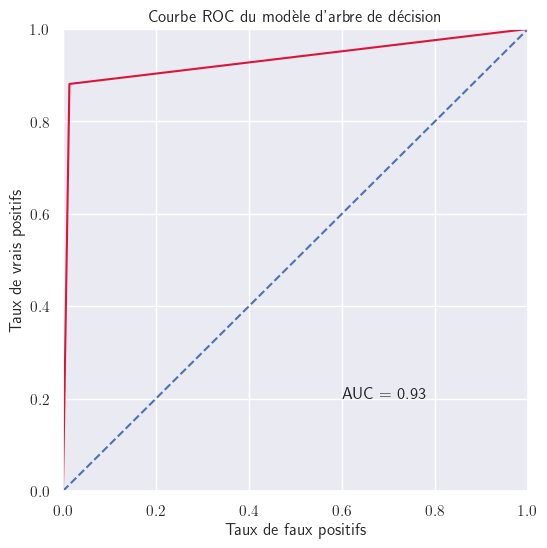

In [44]:
# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})
sns.set_theme()

# Tracer la diagonale du graphique (modèle aléatoire)
fig, ax = plt.subplots(figsize=(6,6))
plt.plot([0,1], [0,1], linestyle='--')

# Courbe ROC
plt.plot(fpr, tpr, color='crimson')
# Affichage AUC
plt.text(0.6,0.2,f"AUC = {round(auc,2)}")

#Titre et axes
plt.title("Courbe ROC du modèle d'arbre de décision")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

La courbe ROC ne contient qu'un point intermédiaire entre l'origine et le point de coordonnées (1;1). Ceci s'explique par le fait que dans notre arbre, chaque feuille ne possède que des individus d'une même classe (uniquement des tumeurs bénignes ou des tumeurs malignes) sur les données d'entraînement. Ainsi la probabilité associée à la catégorie tumeur maligne vaut toujours 0 ou 1. 
- Si on fixe un seuil p = 0, toutes les feuilles sont considérées comme positives pour les données de test. Toutes les tumeurs sont classées positives, donc toutes les tumeurs malignes sont des vrais positifs et toutes les tumeurs bénignes sont de faux positifs. Il n'y a donc pas de vrais négatifs ni de faux négatifs. 

    - Le taux de vrais positifs est donc : $TVP = \dfrac{VP}{VP+FN}=\dfrac{VP}{VP+0}=1$
    - Le taux de faux positifs est : $TFP = \dfrac{FP}{FP+VN}= \dfrac{FP}{FP+0}=1$
    
    On obtient donc le point de coordonnées (1,1).
    
- Si on fixe un seuil p = 1, toutes les feuilles sont considérées comme négatives pour les données de test. Toutes les tumeurs sont classées négatives, donc toutes les tumeurs malignes sont des faux négatifs et toutes les tumeurs bénignes sont de vrais négatifs. Il n'y a donc pas de vrais positifs ni de faux positifs. 

    - Le taux de vrais positifs est donc : $TVP = \dfrac{VP}{VP+FN}=\dfrac{0}{0+FN}=0$
    - Le taux de faux positifs est : $TFP = \dfrac{FP}{FP+VN}= \dfrac{0}{0+VN}=0$
    
    On obtient donc le point de coordonnées (0,0).
    
- Pour toute valeur de p intermédiaire, les feuilles dont la probabilité associée à la catégorie tumeur maligne est 0 sont classées négatives et les autres positives. Quelle que soit la valeur p, on obtient les mêmes taux TVP et TFP et donc le même point.

Il n'y a donc que trois points à placer pour former la courbe ROC.

L'AUC est l'aire sous la courbe ROC. 

- La diagonale bleue correspond à la courbe d'un modèle faisant des prédictions aléatoires. L'aire sous cette diagonale est 0.5 donc si l'AUC de notre modèle est proche de 0.5, il est inutile car il n'est pas meilleur qu'un modèle à prévision aléatoire.
- Le modèle parfait a un taux de faux positifs nul et un taux de vrais positifs égal à 1. Dans ce cas, l'aire sous la courbe vaut 1. Plus l'AUC est proche de 1, plus le modèle est performant.

Ici, notre modèle a un AUC de 0.93, ce qui est un bon score.

### Question 3 : courbe précision-rappel et AUC P-R.

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calcul des coordonées des points de la courbe précision-rappel
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probas)

# Calcul de l'AUC PR
auc_pr = average_precision_score(y_test, y_pred_probas)

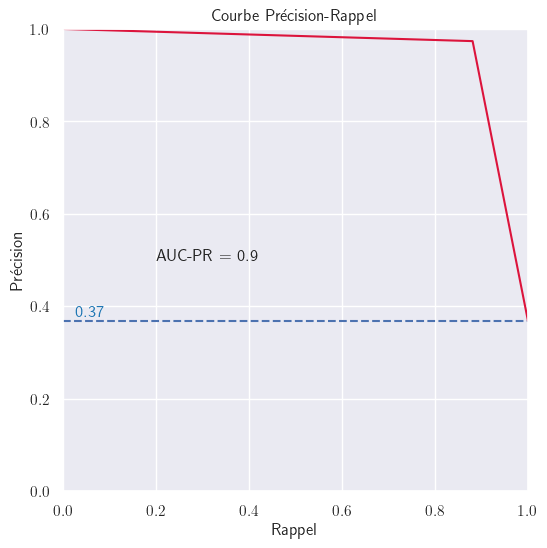

In [46]:
# Tracer ligne d'un modèle aléatoire
prec_alea = np.sum(y_test)/len(y_test)
plt.figure(figsize=(6,6))
plt.plot([0,1],[prec_alea, prec_alea], linestyle='--')
plt.text(0.025,prec_alea+0.01, str(round(prec_alea,2)), color="tab:blue")

# Courbe précision-rappel
plt.plot(recall, precision, color='crimson')

# Affichage AUC-PR
plt.text(0.2, 0.5, f"AUC-PR = {round(auc_pr,2)}")

#Titre et axes
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


L'AUC P-R est de 0.9, soit nettement supérieur à celui d'un modèle aléatoire (0.37).

***
# Projet 3 : consommation d'essence
## Chargement des données

In [47]:
df_auto = pd.read_csv('src/auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [48]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Pas de données manquantes. On remarque que la variable horsepower n'est pas numérique.

In [49]:
df_auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [50]:
df_auto.loc[df_auto['horsepower']=='?'].shape[0]

6

Certaines valeurs de horsepower sont inconnues et notées avec le symbole « ? ». Supprimons les 6 lignes correspondantes.

In [51]:
df_auto = df_auto.loc[df_auto['horsepower']!='?']

## Exercice 1 : arbre de régression et RSME

### Questions 1 à 3 : entraînement d'un arbre de régression

In [52]:
# Définition des features et des labels
X = df_auto.drop(['mpg', 'car name'], axis=1)
y = df_auto['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

In [53]:
# Entraînement arbre de régression
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)

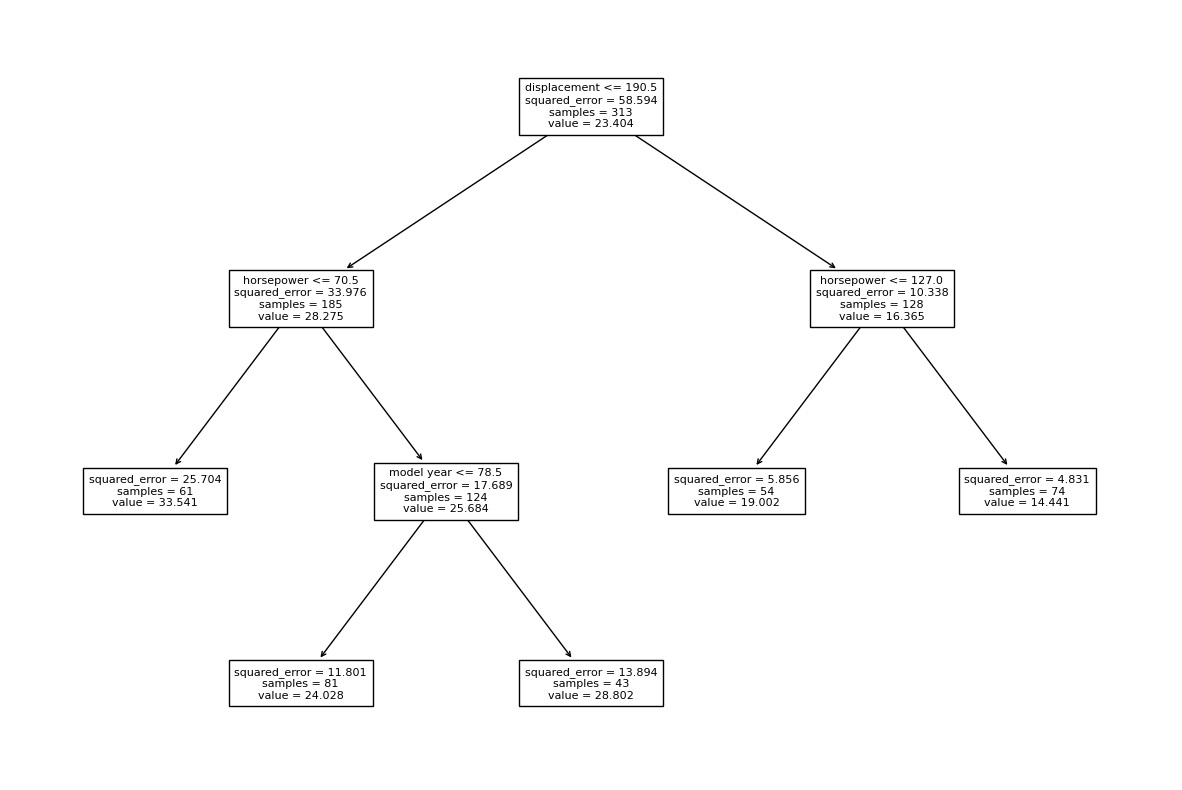

In [54]:
plt.rcParams.update(plt.rcParamsDefault)

feature_names = X_train.columns.tolist()

fig, ax = plt.subplots(figsize=(15,10))
plot_tree(dt, feature_names=feature_names,
          fontsize=8, ax=ax)

plt.show()

Avec le paramètre min_sample_leaf réglé sur 0.13, l'arbre a une profondeur égale à 3. Les trois seules partitions se font sur *displacement*, *horsepower* et *model year*.

### Questions 4 à 7 : évaluation du modèle

#### Evaluation sur les données de test
L'évaluation du modèle va se faire à l'aide du calcul d'erreurs moyennes. Pour cela, nous devons faire une prédiction sur les données de test et ensuite calculer les erreurs de prédiction en calculant l'écart entre chaque prédiction et la valeur réelle de mpg. Nous allons calculer 3 métriques :

- La moyenne de la valeur absolue des erreurs (Mean Absolute Error) : $MAE = \dfrac{1}{n} \displaystyle \sum_{i=1}^n |y_{i_{pred}}-y_{i_{test}}|$
- La moyenne du carré des erreurs (Mean Squared Error) : $MSE = \dfrac{1}{n} \displaystyle \sum_{i=1}^n \left(y_{i_{pred}}-y_{i_{test}}\right)^2$
- La racine carrée de la MSE : $RMSE = \sqrt{MSE}$

En passant les erreurs au carré, la MSE pénalise plus fortement les grandes erreurs que la MAE. Cependant, son unité n'est pas la même que celle de la variable de départ. Pour retrouver une métrique avec la même unité, on calcule la RMSE en prenant la racine carrée de la MSE.

In [55]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

# Prédictions sur données de test
y_pred = dt.predict(X_test)

# Calcul des erreurs 
mae = MAE(y_test, y_pred)
mse = MSE(y_test, y_pred, squared=True)
rmse = MSE(y_test, y_pred, squared=False)
print("MAE =", round(mae,2))
print("MSE =", round(mse,2))
print("RMSE =", round(rmse,2))

MAE = 3.05
MSE = 18.63
RMSE = 4.32


In [56]:
y.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

La RMSE est de 4.32 pour une variable dont la moyenne est 23.4 et l'écart-type 7.8.

#### Evaluation sur les données d'entraînement.

In [57]:
# Prédiction sur données d'entraînement
y_pred_train = dt.predict(X_train)

# Calcul des erreurs 
mae_train = MAE(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train, squared=True)
rmse_train = MSE(y_train, y_pred_train, squared=False)
print("MAE_train =", round(mae_train,2))
print("MSE_train =", round(mse_train,2))
print("RMSE_train =", round(rmse_train,2))

MAE_train = 2.66
MSE_train = 12.12
RMSE_train = 3.48


Les erreurs sont plus faibles sur les données d'entraînement que sur les données de test. 

En calculant la RMSE sur les données d'entraînement, on cherche à savoir si le modèle est dans une situation d'underfitting, d'overfitting ou si son entraînement est correct. 

- Si la RMSE_train est très importante, cela signifie que le modèle se trompe beaucoup sur les données d'entraînement. On est alors dans une situation d'underfitting. 
- Si la RMSE_train est faible mais que la RMSE sur les données de test est beaucoup plus grande, cela signifie que le modèle est trop adapté aux données d'entraînement. Il en a capturé le bruit et n'est donc pas adapté aux données de test. On est dans une situation d'overfitting.

COMMENT EVOLUE RMSE

In [58]:
# Evaluation du modèle suivant la proportion des données utilisées en entraînement

liste_errors=[]
for freq in np.arange(0.1, 0.85, 0.05):
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=freq,
                                                        random_state=1)
    
    # Entraînement modèle
    dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13)
    dt.fit(X_train, y_train)
    # Prédictions
    y_pred = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)
    # Calcul RMSE et RMSE_train
    rmse = MSE(y_test, y_pred, squared=False)
    rmse_train = MSE(y_train, y_pred_train, squared=False)
    liste_errors.append({'pourc_train':freq*100, 'RMSE_train':rmse_train, 'RMSE_test':rmse})
    
erreurs = pd.DataFrame(liste_errors)
erreurs.head()

,pourc_train,RMSE_train,RMSE_test
0,10.0,1.857114,4.239625
1,15.0,2.462955,4.385332
2,20.0,2.452591,4.523452
3,25.0,2.439716,4.580412
4,30.0,2.894936,4.677001


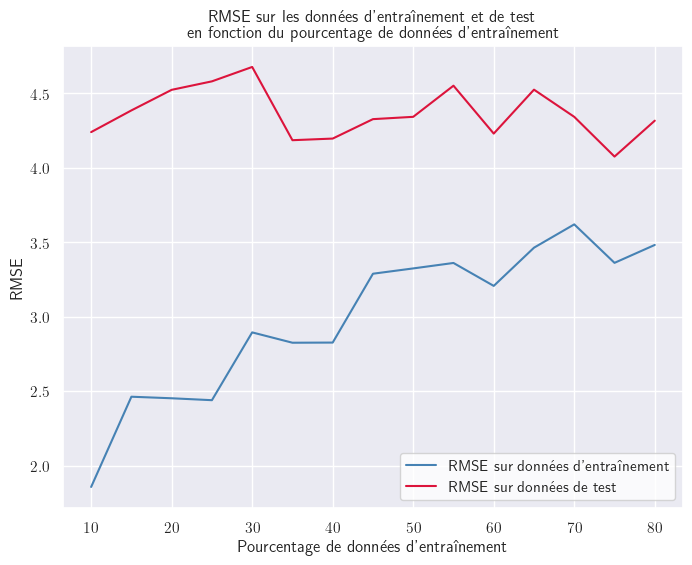

In [59]:
# Changement de police des graphiques
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})
sns.set_theme()
# Courbe d'apprentissage
fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(data=erreurs, x='pourc_train', y='RMSE_train', color='steelblue', label="RMSE sur données d'entraînement")
sns.lineplot(data=erreurs, x='pourc_train', y='RMSE_test', color='crimson', label="RMSE sur données de test")

# Titre, axe et légende
plt.title("RMSE sur les données d'entraînement et de test\nen fonction du pourcentage de données d'entraînement")
plt.xlabel("Pourcentage de données d'entraînement")
plt.ylabel("RMSE")
plt.legend(facecolor='white')
plt.show()

Lorsque le jeu d'entraînement contient peu de données, le modèle s'y adapte étroitement et commet de faibles erreurs de prédictions sur ces données, ce qui explique une RMSE_train faible. Il prend même en compte le bruit et se retrouve en overfitting. En revanche, lorsque les données d'entraînement sont plus nombreuses, le modèle est moins susceptible de s'adapter étroitement à celles-ci. Il prend moins en compte le bruit et commet des erreurs un peu plus grandes, d'où une RMSE plus élevée.

Ici, concernant le pourcentage de données d'entraînement, la plage 10 % - 45 % n'est pas bonne car on voit que le modèle est trop bien adapté aux données d'apprentissage. A partir de 45 % de données réservées à l'entraînement, on atteint un plateau de la RMSE : le modèle a réussi à s'adapter aux données sans capturer le bruit.

La RMSE sur les données de test est relativement stable suivant le pourcentage de données réservées à l'entraînement. Ainsi toute la plage 45 % - 80 % est valable ici.

***
## Exercice 2 : validation croisée

### Question 1 : concept de validation croisée, calcul de l'erreur

La méthode du Hold Out consiste à partager les données en un jeu d'entraînement et un jeu de test. Cependant, le modèle obtenu et ses performances peuvent varier suivant la façon dont la partition est faite. Par exemple en choisissant 20 % de données de test, les résultats peuvent varier suivant qu'on choisisse ces données au début ou à la fin du jeu de données. 
De plus, si le jeu de données est petit, les partitions le sont d'autant plus.

La validation croisée répète plusieurs fois la partition des données en prenant toujours des données de test et d'entraînement différentes. Il existe plusieurs stratégies de validation croisée. L'une s'appelle K-fold. Voici un schéma donnant le principe de cette stratégie pour 5 itérations :

<img src="src/cross_validation_diagram.png" alt="crossvalidation" width="50%"/>

*(Source : [https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_cross_validation.html](https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_cross_validation.html))*


Le jeu de données est partagé en $k$ sous-ensembles (folds). Ici il y en a 5. A chaque itération, $k-1$ folds sont réservés à l'entraînement du modèle et le dernier au test du modèle entraîné. On peut alors calculer les métriques d'évaluation du modèle pour chaque itération et les agréger en calculant leur moyenne et leur écart-type. Cela permet de tenir compte de la variabilité du modèle suivant ses données d'entraînement et de mieux évaluer sa capacité de généralisation à de nouvelles données.

Voici une autre stratégie de validation croisée : le Shuffle split. A chaque itération, les échantillons d'une copie du jeu de données sont mélangés aléatoirement. On partage alors les données en jeux d'entraînement et de test et on évalue le modèle. Puis on agrège les données comme pour le Kfold. Voici un schéma permettant de comprendre cette stratégie :

<img src="src/shufflesplit_diagram.png" alt="crossvalidation" width="50%"/>

*(Source : [https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_train_test.html](https://inria.github.io/scikit-learn-mooc/python_scripts/cross_validation_train_test.html))*

### Question 2 : intérêt de la validation croisée, différence avec le bootstraping, coût.

- Intérêt

Comme dit à la question 1, la validation croisée permet de mieux évaluer le modèle. En choisissant plusieurs jeux de données d'entraînement, on diminue le risque que les données d'entraînement tombent sur une configuration particulière qui n'est pas généralisable à d'autres données. 

- Comparaison avec le Bagging (Bootstrap Aggregating)

A chaque itération, la validation croisée écarte l'entraînement de l'itération précédente. On repart donc d'un modèle vierge. L'idée est simplement d'obtenir la moyenne des scores des différentes itérations pour mieux évaluer le modèle. Mais il ne s'agit pas de créer un modèle plus performant.

Le Bagging permet au contraire de créer un modèle plus performant. L'idée est de créer différentes instances d'un modèle (par exemple, plusieurs instances d'arbres de décision) que j'appelerai ici « sous-modèles ». Pour chacun d'entre-eux, on choisit les échantillons d'entraînement au hasard (étape de bootstrap). Ensuite, pour chaque nouvel échantillon, une prédiction est faite par chaque sous-modèle. On passe alors à l'étape d'aggrégation. Dans le cas d'une régression, la prédiction du modèle complet est la moyenne des prédictions des sous-modèles. Dans le cas d'une classification, on retient la classification majoritaire parmis les sous-modèles. Voici un schéma montrant l'aggrégation pour un problème de régression avec un arbre de classification :

<img src="src/bagging.png" alt="bagging" width="50%"/>

*(Source : [https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_bagging.html](https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_bagging.html))*

Notons que lors du bootstrap, si le jeu de données contient $n$ échantillons, on choisit $n$ échantillons d'entraînement. Cependant, ce tirage aléatoire se fait avec remise. Certains échantillons sont donc tirés plusieurs fois et d'autres ne sont pas tirés. Cela permet d'entraîner chaque sous-modèle sur un ensemble différent.

Enfin, pour évaluer la performance d'un modèle utilisant le Bagging, on peut utiliser une validation croisée.



- Coût de la validation croisée

En répétant $n$ fois le partage du jeu en données d'entraînement et données de test, on multiplie par $n$ le coût en calculs.


- Comment ces techniques permettent d'éviter l'overfitting

Lors d'un entraînement sur un ensemble d'échantillons, un modèle peut s'adapter parfaitement ou presque à ces échantillons, capturant même le bruit qui en provient. En entraînant plusieurs modèles sur plusieurs ensembles d'échantillons, le Bagging peut obtenir certains modèles surentraînés, mais les prédictions de ces-derniers sont aggrégées avec celles d'autres modèles qui ne le sont pas. Ainsi le modèle global n'est pas surentraîné.

De la même manière, lorsqu'on évalue un modèle en faisant une partition des données en jeux de test et d'entraînement, on peut par hasard tomber sur une partition aux caractéristiques particulières et obtenir un modèle qui s'adapte trop bien aux données obtenues et qui est donc en situation de surentraînement. La validation croisée évite cela en évaluant le modèle sur plusieurs partitions. 